# Lab 10.4 - PCA

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

# 10.4 Lab 1: Principal Components Analysis

In [4]:
#load the data 
data = pd.read_csv(r'./data/USArrests.csv')
print(data.shape)
print(data.head())

(50, 5)
   Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6


This data contains states of US
- Name  - name of the states
- Murder - number of arrests for murder per million pop. 
- Assault - number of arrests for assaults per million pop.
- Urbanpop - percentage of population living in urban area
- Rape - number of rape cases per million population

In [5]:
states = data.iloc[:,0]
#names of the states in alphabatical order
print(states)

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [6]:
X = data.iloc[:,1:]
list(X.columns)

['Murder', 'Assault', 'UrbanPop', 'Rape']

In [7]:
X.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


We can from the above table that they have irregular ranges, and assault has the highest value of mean and also std (also variance which is square of std)

So, if we appply PCA to this data, it will give the highest priority to assault, and to avoid this, we will be scaling the data. 

In [8]:
# scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_scaled_df = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled_df.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [10]:
X_scaled_df.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-7.105427e-17,1.387779e-16,-4.396483e-16,8.593126e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


Now, the mean is approximately 0, and std is approximately 1 for all the columns

In [11]:
# using pca to get principal components 
pca = PCA(n_components=4)
pca.fit(X_scaled)

PCA(n_components=4)

In [12]:
#loading vectors
pd.DataFrame(pca.components_,columns = X.columns,index = ['PC_1','PC_2','PC_3','PC_4']).T

,PC_1,PC_2,PC_3,PC_4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


From the above table we can see the loding vectors as combinations of each principal components

In [13]:
# getting the points in principal components
pca_components = pca.transform(X_scaled)
print(pca_components.shape)
df = pd.DataFrame(pca_components,columns = ['PC_1','PC_2','PC_3','PC_4'])
df.head()

(50, 4)


,PC_1,PC_2,PC_3,PC_4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


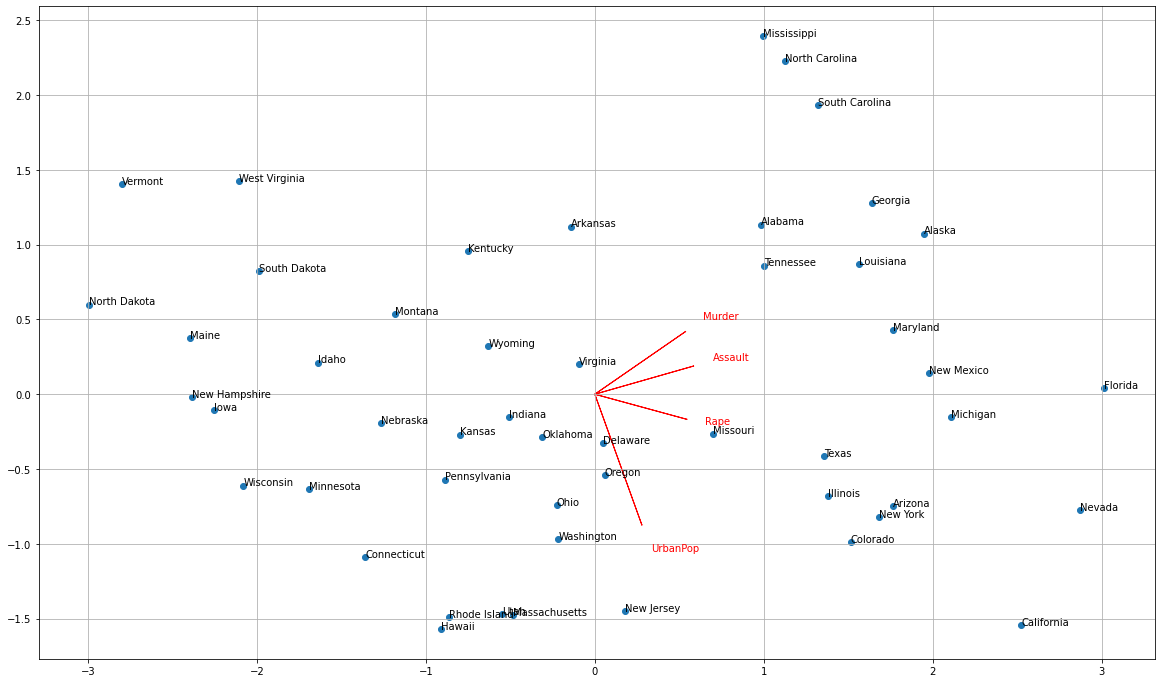

In [14]:
# biplot 
fig, ax = plt.subplots(figsize = (20,12))
ax.grid(True)
ax.scatter(df['PC_1'],df['PC_2'])

names = list(data.iloc[:,0])

for i, txt in enumerate(names):
    ax.annotate(txt, (df['PC_1'][i], df['PC_2'][i]))
    
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(X_scaled)[:,0] # see 'prcomp(my_data)$x' in R
ys = pca.transform(X_scaled)[:,1]


## visualize projections
    
## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i], yvector[i],
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*1.2, yvector[i]*1.2,
             list(X.columns.values)[i], color='r')  

In [15]:
# varianc explained by each pc's
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [16]:
# variance explained ratio's 
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

So, the first pc explaines 2.53 units of variance, which is around 62% of the total variance, the second pc expains 34.7 % of the variance in the data 

<AxesSubplot:>

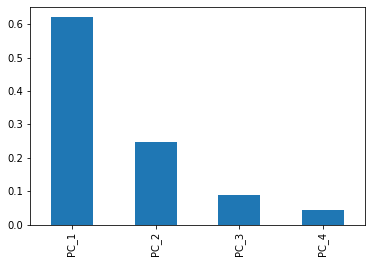

In [17]:
pd.Series(pca.explained_variance_ratio_,index = ['PC_1','PC_2','PC_3','PC_4']).plot.bar()

<AxesSubplot:>

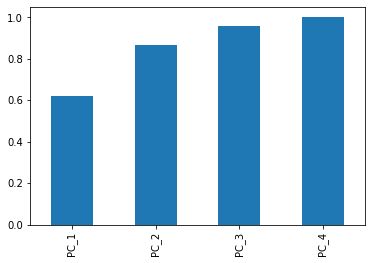

In [18]:
pd.Series(np.cumsum(pca.explained_variance_ratio_),index = ['PC_1','PC_2','PC_3','PC_4']).plot.bar()